In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [102]:
def plot_distrib(df_weekly_all, dataset):
    #before meetoo is from 2015 (0) to september 2017 (week 152)
    percent_b4_metoo = df_weekly_all.iloc[0:152].percent_women
    #after meetoo is from september 2017 till 2020
    percent_post_metoo = df_weekly_all.iloc[152:].percent_women

    #plots
    plt.figure(figsize=(11.7,8.27))
    _, bins_, _ = plt.hist(percent_b4_metoo, bins=30, fc=(0, 0, 1, 0.7))
    plt.hist(percent_post_metoo, bins=bins_, fc=(1, 0, 0, 0.7))
    plt.axvline(x=percent_b4_metoo.mean(), ls='--',c=(0,0,1,1))
    plt.axvline(x=percent_post_metoo.mean(), ls='--',c=(0.5,0,0,1))
    plt.legend(['Before September 2017 (mean)', 'After September 2017 (mean)', 'Before September 2017 (mean)', 'After September 2017'])
    plt.title(f'Weekly percentage of women speakers on {dataset} dataset')
    plt.ylabel('frequency')
    plt.xlabel('percentage of women speaker')
    print(percent_b4_metoo.mean(), percent_post_metoo.mean())
    print(f'The p-value for the {dataset} dataset is {stats.ttest_ind(percent_b4_metoo, percent_post_metoo, nan_policy="omit").pvalue}')

0.16478029518375753 0.1827362820778297
The p-value for the quotebank dataset is 3.014234453842263e-23
0.39318584498662595 0.42098501813616684
The p-value for the women dataset is 1.9597992689394398e-23
0.40640856650390433 0.42541156866556246
The p-value for the metoo dataset is 0.0047404872428748425


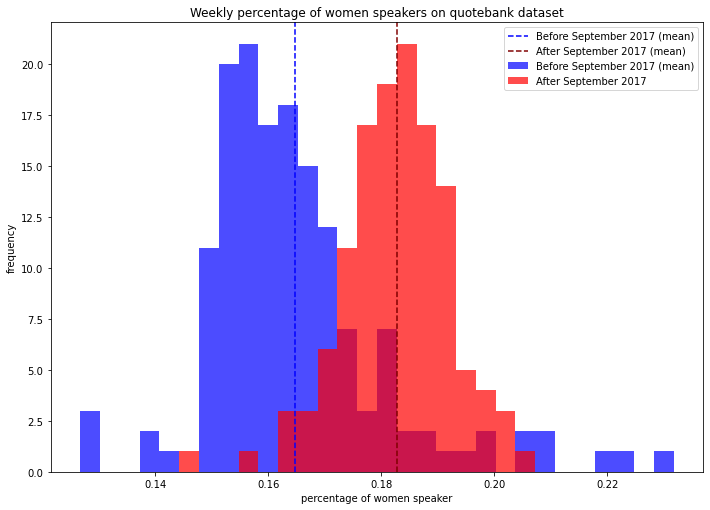

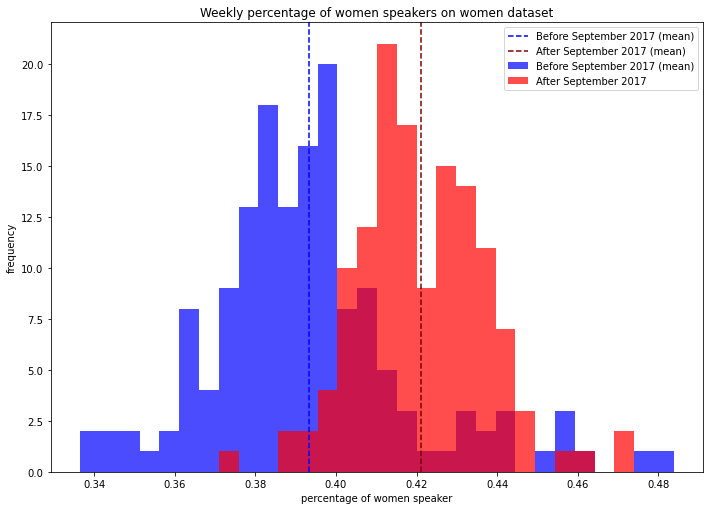

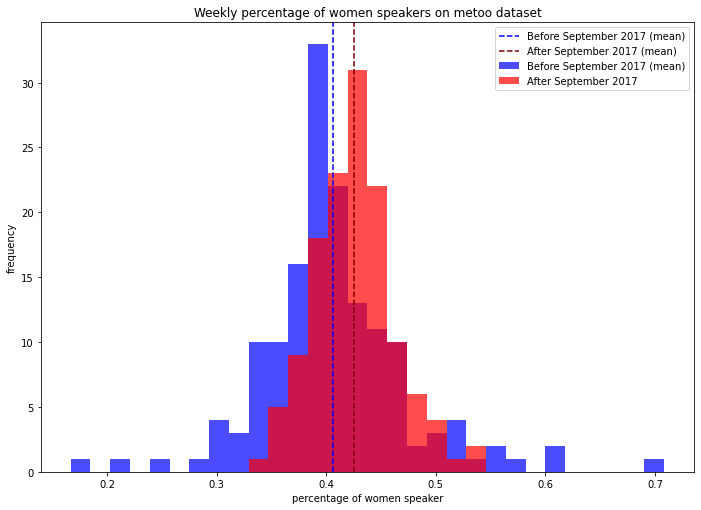

In [103]:
PATH_DATA = './data/data_nlp/weelky_count/'

datasets = ['quotebank','women','metoo']
years = range(2015,2021)

for dataset in datasets:
       #reset frames
       frames = []
       for year in years:

              if dataset == 'quotebank':
                     QUOTES_FILE = PATH_DATA + dataset + f'/{year}_count.csv'
                     df_weekly_count = pd.read_csv(QUOTES_FILE, index_col=0)
              else:
                     QUOTES_FILE = PATH_DATA + dataset + f'/quotes-{year}-filtered_weekly_count.json.bz2'
                     #load the weekly count
                     #print(f'Processing {year}')
                     df_weekly_count = pd.read_json(QUOTES_FILE, lines=True, compression='bz2', typ='frame')
                     #print(df_weekly_count.shape)

              #remove useless columns (only keeping male and female count)
              useless_columns = list(df_weekly_count.columns)
              useless_columns.remove('male')
              useless_columns.remove('female')
              df_weekly_count.drop(useless_columns, axis=1, inplace=True)


              #adding the percentage of women column
              df_weekly_count['male_female'] = df_weekly_count.male + df_weekly_count.female
              df_weekly_count['percent_women'] = df_weekly_count.female/df_weekly_count.male_female

              frames.append(df_weekly_count)

       #create a df with all the weeks from 2015 to 2020
       df_weekly_all = pd.concat(frames)
       df_weekly_all.reset_index(inplace=True)
       #plot the distributions of weekly women percentage
       plot_distrib(df_weekly_all, dataset)


Text(0.5, 0, 'percentage of women speaker')

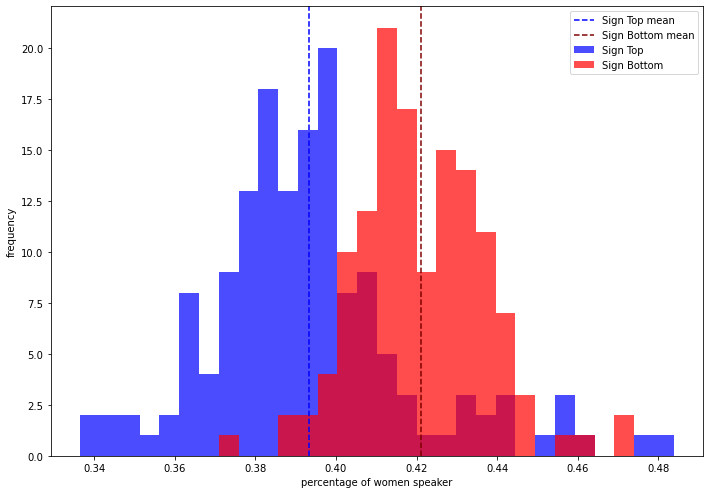

In [22]:
def plot_distrib(df_weekly_all):
    #before meetoo is from 2015 (0) to september 2017 (week 152)
    percent_b4_meetoo = df_weekly_all.iloc[0:152].percent_women
    #after meetoo is from september 2017 till 2020
    percent_post_meetoo = df_weekly_all.iloc[152:].percent_women

    #plots
    plt.figure(figsize=(11.7,8.27))
    _, bins_, _ = plt.hist(percent_b4_meetoo, bins=30, fc=(0, 0, 1, 0.7))
    plt.hist(percent_post_meetoo, bins=bins_, fc=(1, 0, 0, 0.7))
    plt.axvline(x=percent_b4_meetoo.mean(), ls='--',c=(0,0,1,1))
    plt.axvline(x=percent_post_meetoo.mean(), ls='--',c=(0.5,0,0,1))
    plt.legend(['Sign Top mean', 'Sign Bottom mean', 'Sign Top', 'Sign Bottom'])
    plt.ylabel('frequency')
    plt.xlabel('percentage of women speaker')
    print(stats.ttest_ind(percent_b4_meetoo, percent_post_meetoo, nan_policy='omit').pvalue)

The p value obtained when performing this t-test is inferior to 0.05. We can therefore reject the null hypothesis for a significance level of 5%. In other words, we can reject the hypothesis according to which the weekly average percentage of women speakers have the same distribution (same mean) either before or after the meetoo movement started. Therefore, we can conclude that the difference between the two scenarios is statistically significant: women were given more voice in the media when talking about subjects linked to MeToo.